In [4]:
using NCDatasets
using CairoMakie, Makie
using GeoMakie

In [6]:
datadir = "/home/ctroupin/data/CROCO/"
gridfile1 = joinpath(datadir, "croco_grd_nea.nc")
gridfile2 = joinpath(datadir, "croco_grd_nea.nc.1")
bulkfile1 = joinpath(datadir, "DATA_METEO/ERA5/1/LSM_Y2012M12.nc")
bulkfile2 = joinpath(datadir, "DATA_METEO/ERA5/2/LSM_Y2012M12.nc")
isfile(gridfile1) & isfile(bulkfile2)

true

In [11]:
nc = NCDataset(gridfile1) 
    print(nc)
    longrid1 = nc["lon_rho"][:,:]
    latgrid1 = nc["lat_rho"][:,:]
    depth1 = nc["h"][:,:]
    @info(extrema(longrid1));
    @info(extrema(latgrid1));
close(nc)

nc = NCDataset(gridfile2) 
    longrid2 = nc["lon_rho"][:,:]
    latgrid2 = nc["lat_rho"][:,:]
    @info(extrema(longrid2));
    @info(extrema(latgrid2));
close(nc)

Dataset: /home/ctroupin/data/CROCO/croco_grd_nea.nc
Group: /

Dimensions
   one = 1
   xi_rho = 886
   eta_rho = 802
   xi_u = 885
   eta_v = 801
   xi_psi = 885
   eta_psi = 801

Variables
  xl   (1)
    Datatype:    Float64 (Float64)
    Dimensions:  one
    Attributes:
     long_name            = domain length in the XI-direction
     units                = meters

  el   (1)
    Datatype:    Float64 (Float64)
    Dimensions:  one
    Attributes:
     long_name            = domain length in the ETA-direction
     units                = meters

  spherical   (1)
    Datatype:    Char (Char)
    Dimensions:  one
    Attributes:
     long_name            = Grid type logical switch
     option_T             = spherical

  angle   (886 × 802)
    Datatype:    Float64 (Float64)
    Dimensions:  xi_rho × eta_rho
    Attributes:
     long_name            = angle between xi axis and east
     units                = radians

  h   (886 × 802)
    Datatype:    Float64 (Float64)
    Dimensions:

[ Info: (-43.79669506273935, 0.4267415267716374)
[ Info: (21.46741792431093, 50.928794837780295)
[ Info: (-19.52381662393562, -9.401122332354069)
[ Info: (24.304963066175876, 32.37593470915566)


closed Dataset

In [43]:
nc = NCDataset(bulkfile1)
    lonbulk1 = nc["lon"][:]
    latbulk1 = nc["lat"][:]
    nlon = length(lonbulk1)
    nlat = length(latbulk1)
    llon1 = reduce(vcat, (lonbulk1, lonbulk1[end] * ones(nlat), reverse(lonbulk1), lonbulk1[1] * ones(nlat)))
    llat1 = reduce(vcat, (latbulk1[1] * ones(nlon), latbulk1, latbulk1[end] * ones(nlon), reverse(latbulk1)))
close(nc)

closed Dataset

In [51]:
nc = NCDataset(bulkfile2)
    lonbulk2 = nc["lon"][:]
    latbulk2 = nc["lat"][:]
    nlon = length(lonbulk2)
    nlat = length(latbulk2)
    llon2 = reduce(vcat, (lonbulk2, lonbulk2[end] * ones(nlat), reverse(lonbulk2), lonbulk2[1] * ones(nlat)))
    llat2 = reduce(vcat, (latbulk2[1] * ones(nlon), latbulk2, latbulk2[end] * ones(nlon), reverse(latbulk2)))
close(nc)

closed Dataset

In [19]:
function get_rect(longrid, latgrid)
    
    lonrect = reduce(vcat, (longrid[1,:], longrid[:,end], longrid[end,:], longrid[:,1], longrid[1,:]))
    latrect = reduce(vcat, (latgrid[1,:], latgrid[:,end], latgrid[end,:], latgrid[:,1], latgrid[1,:]));

    return lonrect, latrect
end

get_rect (generic function with 1 method)

In [75]:
extrema(depth1)

(5.0, 6000.0)

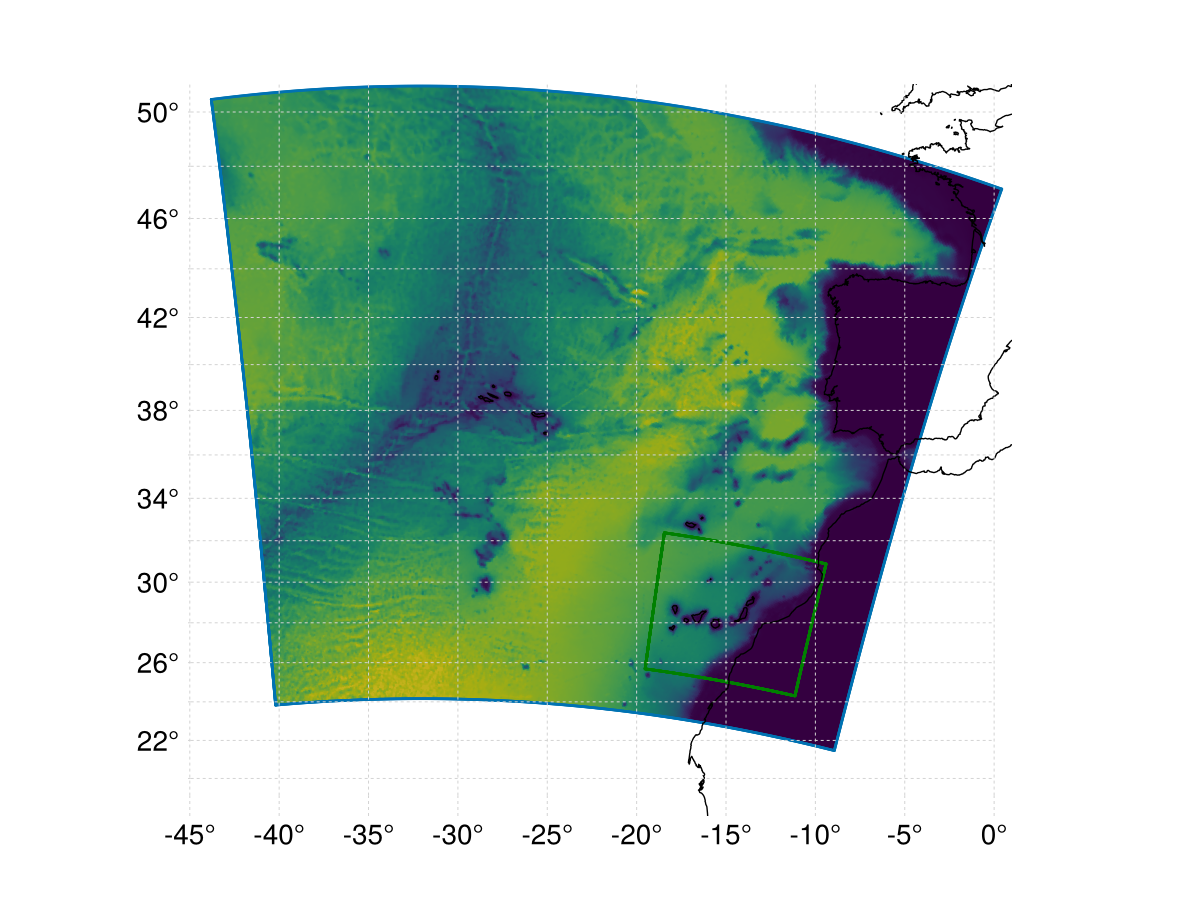

CairoMakie.Screen{IMAGE}


In [74]:
lonrect1, latrect1 = get_rect(longrid1, latgrid1)
lonrect2, latrect2 = get_rect(longrid2, latgrid2)

fig = Figure()
ax = GeoAxis(fig[1,1], dest = "+proj=merc", 
    xgridcolor = :lightgray, xgridwidth = 0.5, 
    xgridstyle = :dash, ygridcolor = :lightgray, 
    ygridwidth = 0.5, ygridstyle = :dash, 
    xticks = collect(-50.:5:0.))#, yticks=collect(25.:5.:45.))

xlims!(ax, -45.1, 1.)
ylims!(ax, 18., 51.)
surface!(ax, longrid1, latgrid1, zeros(size(longrid1)), color=depth1, colormap=:deep)
plot!(ax, lonrect1, latrect1, markersize=2)
plot!(ax, lonrect2, latrect2, color="green", markersize=2)
# plot!(ax, llon1, llat1, color="green")
# plot!(ax, llon2, llat2, color="black")
lines!(ax, GeoMakie.coastlines(10), color=:black, linewidth=0.7) 
display(fig)